**Table of contents**<a id='toc0_'></a>    
- [Проект:  Анализ данных сервиса аренды самокатов GoFast. Статистический анализ данных](#toc1_)    
  - [Описание проекта](#toc1_1_)    
  - [Загрузка данных](#toc1_2_)    
    - [Описание данных `users_data`](#toc1_2_1_)    
    - [Описание данных `rides_data`](#toc1_2_2_)    
    - [Описание данных `subscription_data`](#toc1_2_3_)    
  - [Предобработка данных](#toc1_3_)    
      - [Преобразования в `rides_data`](#toc1_3_1_1_)    
      - [Преобразования в `users_data`](#toc1_3_1_2_)    
      - [Преобразования в `subscriptions_data`](#toc1_3_1_3_)    
  - [Исследовательский анализ данных](#toc1_4_)    
    - [Частота встречаемости городов](#toc1_4_1_)    
    - [Соотношение пользователей с подпиской и без подписки](#toc1_4_2_)    
    - [ Возраст пользователей](#toc1_4_3_)    
    - [Расстояние, которое пользователь преодолел за одну поездку](#toc1_4_4_)    
    - [Продолжительность поездок](#toc1_4_5_)    
  - [Объединение данных](#toc1_5_)    
  - [Подсчет выручки](#toc1_6_)    
  - [Проверка гипотез](#toc1_7_)    
    - [Вопрос №1.](#toc1_7_1_)    
    - [Вопрос №2.](#toc1_7_2_)    
    - [Вопрос №3.](#toc1_7_3_)    
    - [Вопрос №4.](#toc1_7_4_)    
  - [Распределения](#toc1_8_)    
    - [Задача №1.](#toc1_8_1_)    
    - [Задача №2.](#toc1_8_2_)    
  - [Общий вывод](#toc1_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Проект:  Анализ данных сервиса аренды самокатов GoFast. Статистический анализ данных](#toc0_)

## <a id='toc1_1_'></a>[Описание проекта](#toc0_)

Для популярного сервиса аренды самокатов GoFast необходимо:  
 * проанализировать данные о некоторых пользователях из нескольких городов, а также об их поездках;  
 * проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.    


Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:  

* *без подписки*  
абонентская плата отсутствует;  
стоимость одной минуты поездки — 8 рублей;  
стоимость старта (начала поездки) — 50 рублей;  

* *с подпиской Ultra*  
абонентская плата — 199 рублей в месяц;  
стоимость одной минуты поездки — 6 рублей;  
стоимость старта — бесплатно.
  

План работы:  

В рамках данного проекта проводятся работы с данными, охватывающие следующие основные этапы:
- Импорт данных: с помощью Python и его библиотек
- Первичный анализ данных: обзор данных, проверка на наличие недостающих значений или аномалий
- Предобработка данных: обработка пропущенных и аномальных значений
- Исследовательский анализ данных и проверка гипотез
- Выводы: на основе полученных результатов будут сделаны выводы и предложены рекомендации по их использованию или дальнейшему исследованию.


## <a id='toc1_2_'></a>[Загрузка данных](#toc0_)

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
from scipy.stats import binom, norm

percentiles = [0.02,0.05,0.1,0.25,0.5,0.75,0.90,0.95,0.98]

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [ ]:
!pip install squarify
import squarify

- Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.
- Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

In [3]:
# Загрузим файл `/users_go.csv`
users_data = pd.read_csv('/datasets/users_go.csv')

# Загрузим файл `/rides_go.cvs`
rides_data = pd.read_csv('/datasets/rides_go.csv')

# Загрузим файл `/subscriptions_go.csv`
subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')

In [4]:
# Запишем функцию для просмотра общей информации по DataFrame

def df_info(df):
  print('Общая информация \n')
  display(df.info())
  print('\n')
  print('Первые 5 строк DataFrame \n')
  display(df.head())
  print('\n')
  print('Поиск дубликатов')
  print('Найдено дубликатов:', df.duplicated().sum())
  print('\n')
  print('Проверка на пропуски')
  display(df.isna().sum())


### <a id='toc1_2_1_'></a>[Описание данных `users_data`](#toc0_)

В основных данных есть информация о пользователях, их поездках и подписках.  

Пользователи

* `user_id` -	уникальный идентификатор пользователя
* `name` -	имя пользователя
* `age` -	возраст
* `city` - город
* `subscription_type`	тип подписки (free, ultra)

In [5]:
# Обзор users_data
df_info(users_data)

Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None



Первые 5 строк DataFrame 



,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra




Поиск дубликатов
Найдено дубликатов: 31


Проверка на пропуски


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Датасет `users_data` содержит 1565 записей.  
Найдено дубликатов - 31, пропусков в данных не обнаружено.  
Необходимо обработать дубликаты.  
Параметр `subscription_type` стоит изменить на категориальный тип.

### <a id='toc1_2_2_'></a>[Описание данных `rides_data`](#toc0_)

Поездки  

* `user_id` -	уникальный идентификатор пользователя
* `distance` -	расстояние, которое пользователь проехал в текущей сессии (в метрах)
* `duration` -	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* `date` - дата совершения поездки

In [6]:
# Обзор rides_data
df_info(rides_data)

Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None



Первые 5 строк DataFrame 



,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28




Поиск дубликатов
Найдено дубликатов: 0


Проверка на пропуски


user_id     0
distance    0
duration    0
date        0
dtype: int64

Датасет `rides_data` содержит 18068 записей.  
Дубликатов и пропусков не обнаружено.  
Параметр `date` необходимо изменить на формат даты.

### <a id='toc1_2_3_'></a>[Описание данных `subscription_data`](#toc0_)

Подписки

* `subscription_type` -	тип подписки
* `minute_price` -	стоимость одной минуты поездки по данной подписке
* `start_ride_price` -	стоимость начала поездки
* `subscription_fee` -	стоимость ежемесячного платежа


In [7]:
# Обзор subscriptions_data
df_info(subscriptions_data)

Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None



Первые 5 строк DataFrame 



,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199




Поиск дубликатов
Найдено дубликатов: 0


Проверка на пропуски


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Датасет `subscriptions_data` содержит 2 записи о тарифах.  
Дубликатов и пропусков не обнаружено.  
Параметр `subscriptions_type` необходимо изменить на категориальный формат.

## <a id='toc1_3_'></a>[Предобработка данных](#toc0_)

1. Приведем столбец `date` к типу даты pandas.  
2. Создадим новый столбец с номером месяца на основе столбца `date`.  
3. Обработаем дубликаты.  
4. Сменим тип данных для `subscriptions_type` на категориальный.

#### <a id='toc1_3_1_1_'></a>[Преобразования в `rides_data`](#toc0_)

In [8]:
# Приведем столбец date к типу даты pandas
rides_data.date = pd.to_datetime(rides_data.date)

In [9]:
# Создадим новый столбец с номером месяца на основе столбца date
rides_data['month'] = rides_data.date.dt.month

In [10]:
# Проверим, за какой период собраны данные
print('Данные собраны за период с', rides_data.date.min().date().strftime('%d.%m.%Y'), 'по', 
      rides_data.date.max().date().strftime('%d.%m.%Y'))

Данные собраны за период с 01.01.2021 по 30.12.2021


In [11]:
# Проверим результат преобразований
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


#### <a id='toc1_3_1_2_'></a>[Преобразования в `users_data`](#toc0_)

В `users_data` найден 31 дубликат. Удалим их.

In [12]:
# Обработаем дубликаты в users_data
users_data.drop_duplicates(inplace=True)

Преобразуем столбцы `subscription_type` и `user_id` в категориальный формат

In [13]:
users_data.subscription_type = users_data.subscription_type.astype('category')

In [14]:
users_data.user_id = users_data.user_id.astype('category')

In [15]:
# Проверим результат преобразований
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   user_id            1534 non-null   category
 1   name               1534 non-null   object  
 2   age                1534 non-null   int64   
 3   city               1534 non-null   object  
 4   subscription_type  1534 non-null   category
dtypes: category(2), int64(1), object(2)
memory usage: 96.8+ KB


#### <a id='toc1_3_1_3_'></a>[Преобразования в `subscriptions_data`](#toc0_)

Преобразуем столбец `subscription_type` в категориальный формат

In [16]:
subscriptions_data.subscription_type = subscriptions_data.subscription_type.astype('category')

In [17]:
# Проверим результат преобразований
subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   subscription_type  2 non-null      category
 1   minute_price       2 non-null      int64   
 2   start_ride_price   2 non-null      int64   
 3   subscription_fee   2 non-null      int64   
dtypes: category(1), int64(3)
memory usage: 306.0 bytes


-------------------
Были загружены и предварительно обработаны данные из трех файлов.
Созданы 3 датафрейма:

- `users_data` содержит информацию о пользователях, состоит из 1565 строк. Обнаружено и обработано явных дубликатов - 31.
- `rides_data` содержит информацию о поездках, состоит из 18068 строк. Явных дубликатов нет.
- `subscriptions_data` содержит описание тарифов, состоит из двух записей. Дубликатов нет. 

Пропуски в таблицах отсутствуют.  
Для столбцов `data`, `subscription_type`, `user_id` исправлены типы данных.   
Данные собраны за период с 01.01.2021г. по 30.12.2021г.


----------------


## <a id='toc1_4_'></a>[Исследовательский анализ данных](#toc0_)

Рассмотрим и визуализируем общую информацию о пользователях и поездках:  
1. частота встречаемости городов;  
2. соотношение пользователей с подпиской и без подписки;  
3. возраст пользователей;  
4. расстояние, которое пользователь преодолел за одну поездку;  
5. продолжительность поездок.  

### <a id='toc1_4_1_'></a>[Частота встречаемости городов](#toc0_)

In [18]:
# Список городов
users_data.city.value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

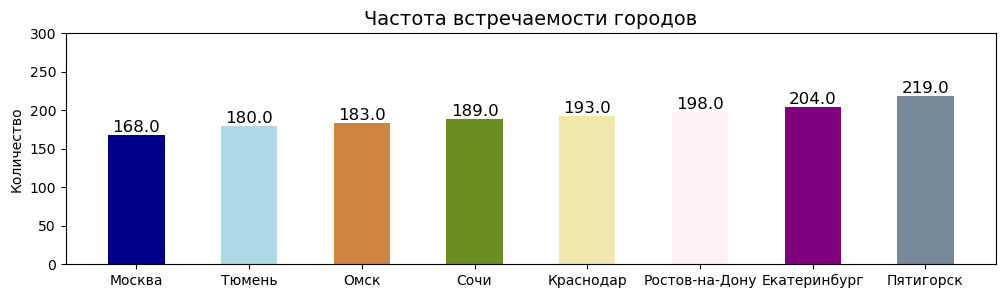

In [19]:
# График частоты встречаемости городов:
# Столбчатая диаграмма

city_hist = users_data.groupby('city').size().reset_index(name='counts')
city_hist = city_hist.sort_values(by='counts', ascending=True)
n = city_hist['city'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(12,3));
plt.bar(city_hist['city'], city_hist['counts'], color=c, width=0.5)
for i, val in enumerate(city_hist['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.gca().set_xticklabels(city_hist['city'], rotation=0, horizontalalignment= 'center');
plt.title("Частота встречаемости городов", fontsize=14)
plt.ylabel('Количество')
plt.ylim(0, 300)
plt.show()


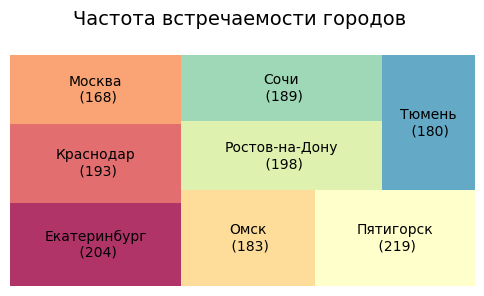

In [20]:
# График частоты встречаемости городов:
# Treemap

city_counts = users_data.groupby('city').size().reset_index(name='counts')
labels = city_counts.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = city_counts['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(6,3))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Частота встречаемости городов \n', fontsize=14)
plt.axis('off')
plt.show()

В Датасете имеются данные по 8-ми городам России: Москва, города юга (Сочи, Краснодар, Ростов-на-Дону, Пятигорск) и города Тюмень, Омск и Екатеринбург.
  
Больше всего в данных пользователей из г.Пятигорска, менее всего - из Москвы

### <a id='toc1_4_2_'></a>[Соотношение пользователей с подпиской и без подписки](#toc0_)

In [21]:
# Количество пользователей по каждому типу подписки
users_data.subscription_type.value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

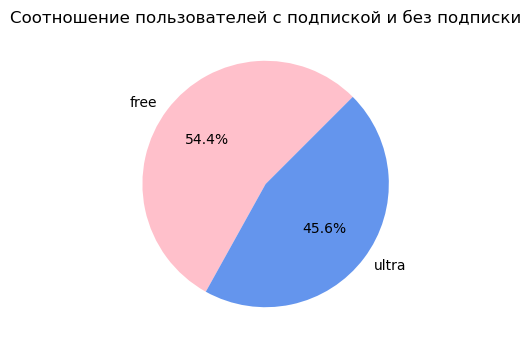

In [22]:
# Построим круговую диаграмму

users_data.groupby('subscription_type').size().plot(kind='pie', subplots=True, figsize=(4, 4), colors=['#FFC0CB', '#6495ED'],autopct='%1.1f%%', startangle=45)
plt.title("Соотношение пользователей с подпиской и без подписки", fontsize= 12 )
plt.ylabel("")
plt.show()

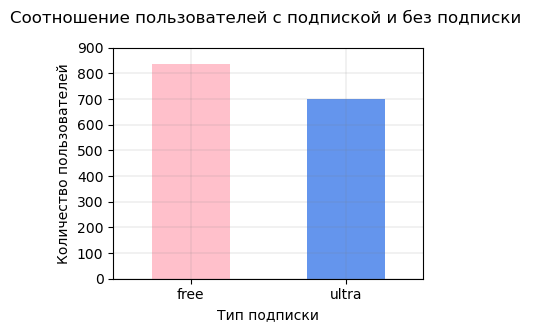

In [23]:
# Построим столбчатую диаграмму
users_data.groupby('subscription_type').size().plot(kind='bar', stacked=False, color=['#FFC0CB','#6495ED'], figsize=(4,3))
plt.title("Соотношение пользователей с подпиской и без подписки \n", fontsize= 12)
plt.ylabel('Количество пользователей')
plt.yticks(range(0,1000,100))
plt.xlabel('Тип подписки')
plt.xticks(rotation=0)
plt.grid(True, which='both', color='grey', linewidth=0.15)
plt.show()


Количество пользователей с подпиской составляет 45.6% от общего числа пользователей в датасете.

### <a id='toc1_4_3_'></a>[ Возраст пользователей](#toc0_)

In [24]:
# Описательные статистики параметра - возраст пользователей
users_data.describe(percentiles).T

,count,mean,std,min,2%,5%,10%,25%,50%,75%,90%,95%,98%,max
age,1534.0,24.90352,4.572367,12.0,15.0,17.0,19.0,22.0,25.0,28.0,31.0,33.0,34.0,43.0


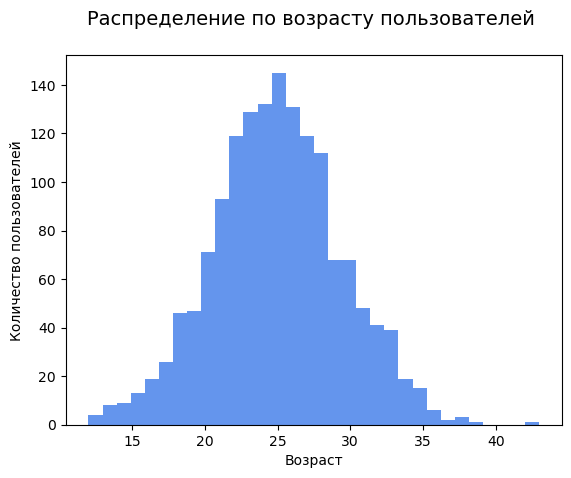

In [25]:
# Построим гистограмму для параметра - возраст пользователя
plt.hist(users_data['age'], bins=32, color='#6495ED')
plt.title('Распределение по возрасту пользователей \n', fontsize=14)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

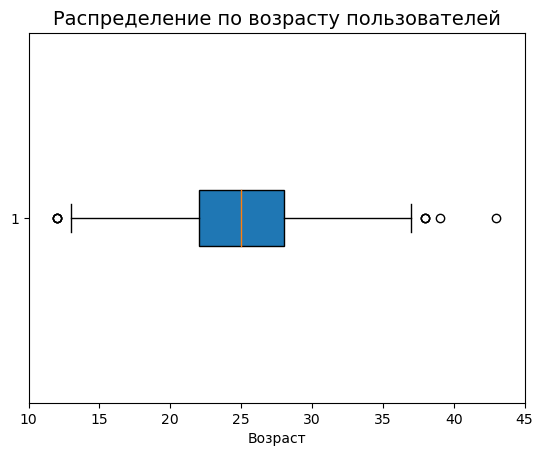

In [26]:
# Построим график barplot для анализа наличия выбросов
plt.boxplot(users_data['age'], vert=False, patch_artist=True)

plt.title('Распределение по возрасту пользователей', fontsize=14)
plt.xlabel('Возраст')
plt.xticks(range(10,50,5))
plt.show()

Можно отметить, что возраст пользователей от 12 до 43 лет.  
При этом возраст 90% клиентов между 19 и 31 годами.  
Среднее и медиана практически совпадают, что говорит о незначительном количестве выбросов.

### <a id='toc1_4_4_'></a>[Расстояние, которое пользователь преодолел за одну поездку](#toc0_)

In [27]:
# Описательные статистики
rides_data['distance'].describe(percentiles)

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
2%         350.912459
5%         689.007279
10%       1517.693302
25%       2543.226360
50%       3133.609994
75%       3776.222735
90%       4392.129872
95%       4740.088596
98%       5172.300006
max       7211.007745
Name: distance, dtype: float64

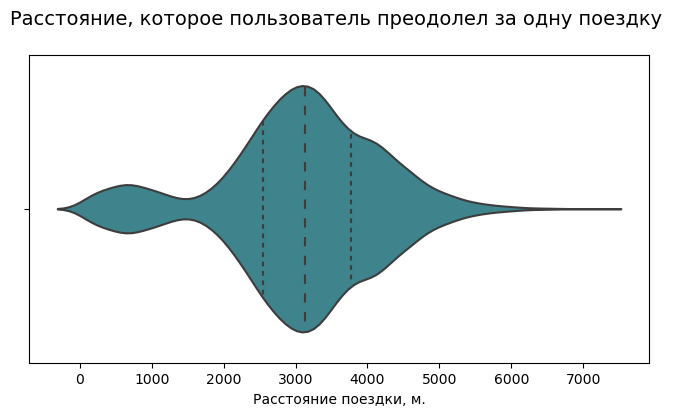

In [28]:
# Построим график распределения расстояний поездок
# Violin
plt.figure(figsize=(8,4))
sns.violinplot(x='distance', data=rides_data, scale='width', inner='quartile', color='#328D99')

plt.title('Расстояние, которое пользователь преодолел за одну поездку \n', fontsize=14)
plt.xlabel('Расстояние поездки, м.')
plt.show()

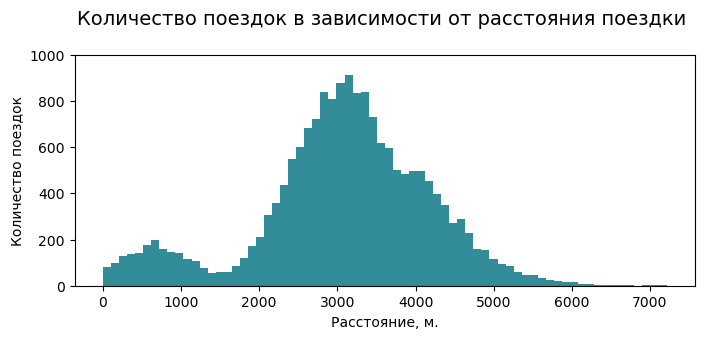

In [29]:
# Построим график распределения расстояний поездок
# Гистограмма
plt.figure(figsize=(8,3))
plt.hist(rides_data['distance'], bins=70, color='#328D99')
plt.title('Количество поездок в зависимости от расстояния поездки \n', fontsize=14)
plt.ylabel('Количество поездок')
plt.xlabel('Расстояние, м.')
plt.yticks(range(0,1200,200))
plt.show()


Данные содержат информацию о поездках на расстояния от 1м. до 7200м.  
50% поездок было совершено на расстояние 2500-3700м.  
При этом также имеется небольшая, но явно определяющаяся группа поездок на расстояние до 1 километра.  
Можно предположить о как минимум двух сценариях пользования самоката — на короткие расстояния (до 1км) и на более длинные (2.5-3.5км).

### <a id='toc1_4_5_'></a>[Продолжительность поездок](#toc0_)

In [30]:
# Описательные статистики
rides_data['duration'].describe(percentiles)

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
2%           5.588399
5%           8.244528
10%         10.293593
25%         13.597563
50%         17.678395
75%         21.724800
90%         25.760508
95%         28.428730
98%         31.125697
max         40.823963
Name: duration, dtype: float64

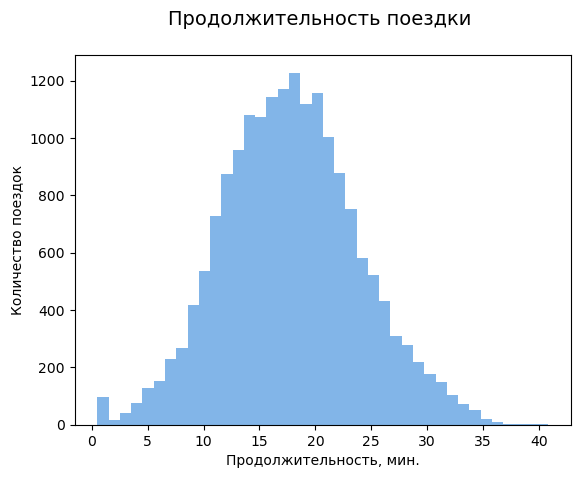

In [31]:
# Построим гистограмму распределения по продолжительности поездок
plt.hist(rides_data['duration'], bins=40, color='#82B5E8')
plt.title('Продолжительность поездки \n', fontsize=14)
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Количество поездок')
plt.show()

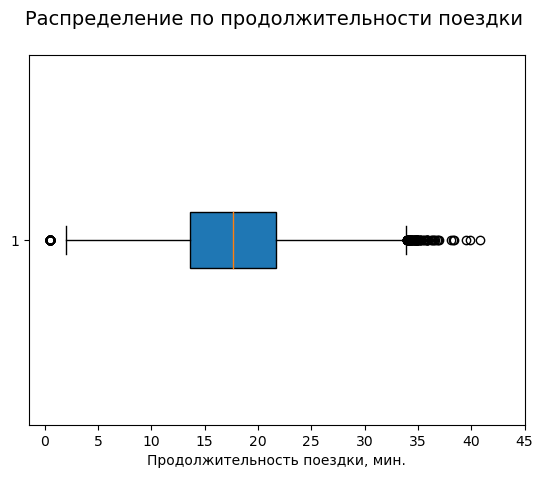

In [32]:
# Построим график barplot для анализа наличия выбросов
plt.boxplot(rides_data['duration'], vert=False, patch_artist=True)

plt.title('Распределение по продолжительности поездки \n', fontsize=14)
plt.xlabel('Продолжительность поездки, мин.')
plt.xticks(range(0,50,5))
plt.show()

In [33]:
# Проверим среднюю скорость движения во время поездок
rides_data['speed_km_h'] = (rides_data['distance']/rides_data['duration'])/16.7

In [34]:
rides_data['speed_km_h'] = round(rides_data['speed_km_h'],2)

In [35]:
# Количество записей со скоростью более 30км/ч
rides_data[rides_data['speed_km_h'] > 30].duration.count()

95

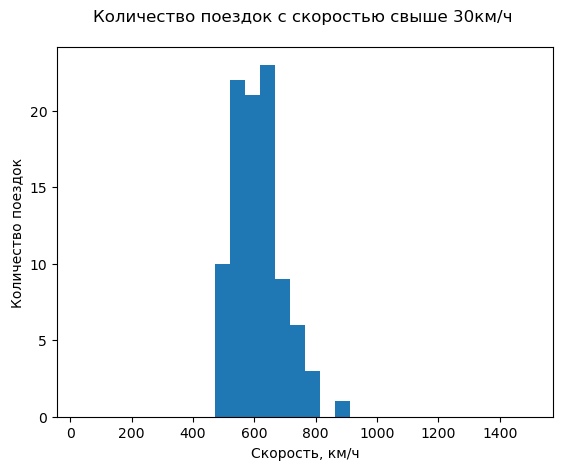

In [36]:
# График распределения поездок со скоростью свыше 30км/ч
plt.hist(rides_data.speed_km_h, bins=30, range=(30,1500))
plt.title('Количество поездок с скоростью свыше 30км/ч \n')
plt.xlabel('Скорость, км/ч')
plt.ylabel('Количество поездок')
plt.show()

In [37]:
# Продолжительность поездок с неадекватной скоростью
rides_data[rides_data['speed_km_h'] >30].duration.value_counts()

duration
0.5    95
Name: count, dtype: int64

Средняя продолжительность поездок составляет около 17мин.  
Подавляющее большинство поездок занимают от 5 до 31 мин.

Были выявлены 95 записей, где средняя скорость поездки превышает 400км/ч. При этом длительность этих поездок - менее минуты.  
Возможно, при моментальном отказе клиента от услуги расстояние учитывается некорректно.   

## <a id='toc1_5_'></a>[Объединение данных](#toc0_)

1. Объединим данные о пользователях, поездках и подписках в один датафрейм.  
2. Создадим ещё два датафрейма из датафрейма, созданного на этапе 1:  
  - c данными о пользователях без подписки (free);  
  - с данными о пользователях с подпиской (ultra).  

3. Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.      

In [38]:
# Объединим данные о пользователях, поездках и подписках в один датафрейм

# Объединение users_data и rides_data
merged_data_ = users_data.merge(rides_data, on='user_id')

# Объединение полученного датафрейма с subscriptions_data
merged_data = merged_data_.merge(subscriptions_data, on='subscription_type')

In [39]:
# вывод результата
merged_data.sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,speed_km_h,minute_price,start_ride_price,subscription_fee
5097,548,Степан,15,Омск,ultra,1311.201914,12.556010,2021-08-28,8,6.25,6,0,199
4731,510,Роман,24,Ростов-на-Дону,ultra,3343.125940,14.023502,2021-01-07,1,14.28,6,0,199
3144,339,Юлиана,24,Краснодар,ultra,3263.518755,20.832445,2021-12-18,12,9.38,6,0,199
12268,1121,Юлия,23,Пятигорск,free,2640.315400,13.200860,2021-11-04,11,11.98,8,50,0
10488,991,Вера,28,Тюмень,free,2251.530499,9.140538,2021-12-17,12,14.75,8,50,0


In [40]:
# Проверим количество записей в полученной таблице
merged_data.shape

(18068, 13)

In [41]:
# Проверим, появились ли пропуски в новой таблице
merged_data.isna().sum().sum()

0

В полученной таблице 18068 записей, что соответствует количеству строк в большей из объединенных таблиц - rides_data.  
Пропусков нет.

In [42]:
# Создадим ещё два датафрейма
tariff_ultra_data = merged_data[merged_data['subscription_type'] == 'ultra']
tariff_free_data = merged_data[merged_data['subscription_type'] == 'free']

In [43]:
# Статистики записей с подпиской
print('Тариф ULTRA')
tariff_ultra_data[['distance', 'duration']].describe().round(2).T

Тариф ULTRA


,count,mean,std,min,25%,50%,75%,max
distance,6500.0,3115.45,836.90,244.21,2785.44,3148.64,3560.57,5699.77
duration,6500.0,18.54,5.57,3.76,14.52,18.18,21.88,40.82


In [44]:
# Статистики записей без подписки
print('Тариф FREE')
tariff_free_data[['distance', 'duration']].describe().round(2).T

Тариф FREE


,count,mean,std,min,25%,50%,75%,max
distance,11568.0,3045.50,1246.17,0.86,2366.56,3114.65,3905.70,7211.01
duration,11568.0,17.39,6.33,0.50,12.96,17.33,21.59,34.95




---



Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

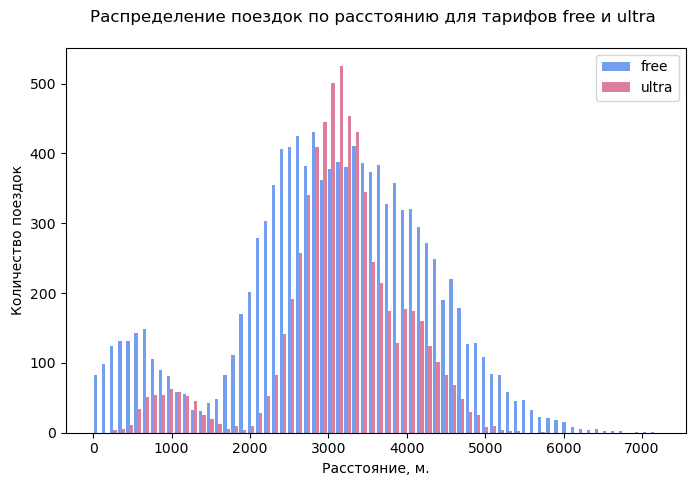

In [45]:
# Визуализируем информацию о расстоянии для пользователей обеих категорий
# График распределения поездок по расстоянию для тарифов free и ultra
plt.figure(figsize=(8,5))
plt.hist([tariff_free_data['distance'], tariff_ultra_data['distance']], bins=70,  label=['free', 'ultra'], alpha=0.9, color=('#6495ED','#DB7093'))
plt.legend()
plt.title('Распределение поездок по расстоянию для тарифов free и ultra \n')
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество поездок')
plt.show()

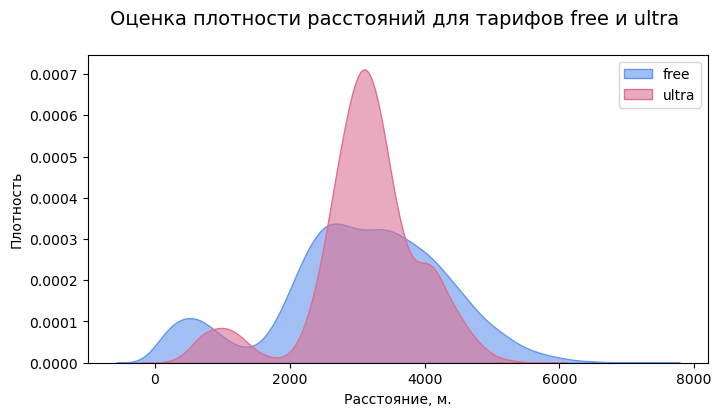

In [46]:
# Оценка плотности
plt.figure(figsize=(8,4))
sns.kdeplot(tariff_free_data.distance, shade=True, color='#6495ED', label="free", alpha=0.6)
sns.kdeplot(tariff_ultra_data.distance, shade=True, color='#DB7093', label="ultra", alpha=0.6)

plt.title('Оценка плотности расстояний для тарифов free и ultra \n', fontsize=14)
plt.ylabel('Плотность')
plt.xlabel('Расстояние, м.')
plt.legend()
plt.show()


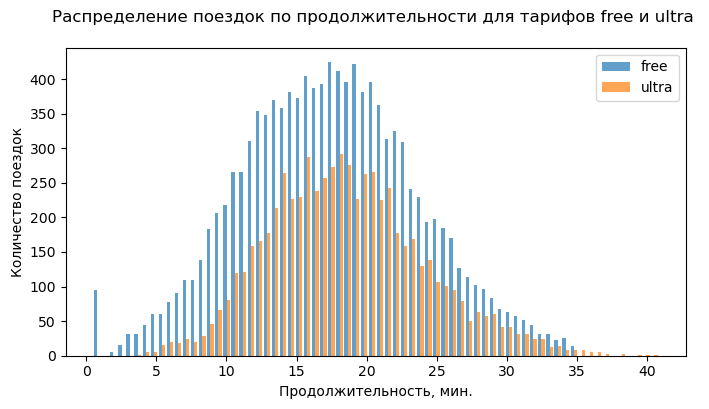

In [47]:
# Визуализируем информацию о продолжительности поездок для пользователей обеих категорий
# График распределения поездок по продолжительности для тарифов free и ultra
plt.figure(figsize=(8,4))
plt.hist([tariff_free_data['duration'], tariff_ultra_data['duration']], bins=70,  label=['free', 'ultra'], alpha=0.7)
plt.legend()
plt.title('Распределение поездок по продолжительности для тарифов free и ultra \n')
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Количество поездок')
plt.show()

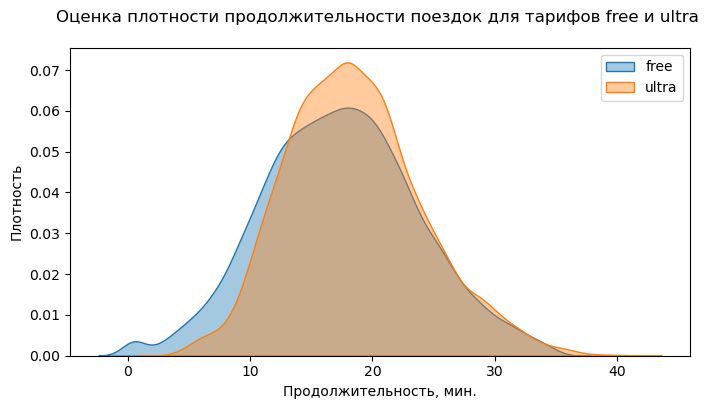

In [48]:
# Оценка плотности
plt.figure(figsize=(8,4))
sns.kdeplot(tariff_free_data.duration, shade=True, label="free", alpha=0.4)
sns.kdeplot(tariff_ultra_data.duration, shade=True, label="ultra", alpha=0.4)

plt.title('Оценка плотности продолжительности поездок для тарифов free и ultra \n', fontsize=12)
plt.ylabel('Плотность')
plt.xlabel('Продолжительность, мин.')
plt.legend()
plt.show()

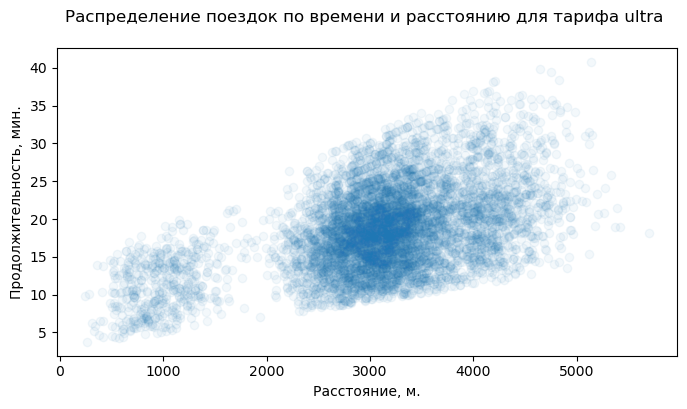

In [49]:
# График Scatter plot для тарифа ultra
plt.figure(figsize = (8,4))
plt.scatter(tariff_ultra_data['distance'], tariff_ultra_data['duration'], alpha=0.05)
plt.title('Распределение поездок по времени и расстоянию для тарифа ultra \n')
plt.xlabel('Расстояние, м.')
plt.ylabel('Продолжительность, мин.')
plt.show()


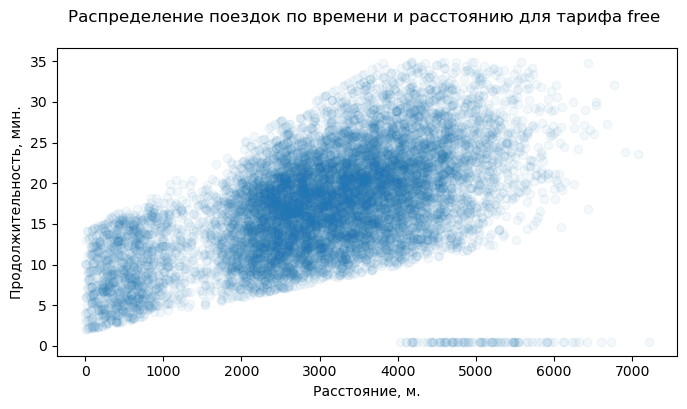

In [50]:
# График Scatter plot для тарифа free
plt.figure(figsize = (8,4))
plt.scatter(tariff_free_data['distance'], tariff_free_data['duration'], alpha=0.05)
plt.title('Распределение поездок по времени и расстоянию для тарифа free \n')
plt.xlabel('Расстояние, м.')
plt.ylabel('Продолжительность, мин.')
plt.show()

По графикам можно видеть, что сценарии использования самоката отличаются в зависимости от того, подключил ли пользователь подписку.  

Пользователи с подпиской чаще арендуют самокат для поездки на расстояния 2.7 - 3.5км, коротких поездок — небольшое количество. Можно предположить, что постоянные клиенты пользуются услугой для поездки на такие расстояния, где пешком - не быстро, а для заказа такси или для использования общественного транспорта — расстояние не большое.

Пользователи без подписки чаще используют самокаты для коротких поездок (до 1 километра), а для более длинных поездок можно видеть больший разброс по значениям расстояния. С учетом частотности южных городов страны в записях, возможно без подписки пользователи часто используют самокат на прогулках и в отпуске. Также, именно у пользователей без подписки можно отметить записи с нулевой продолжительностью поездок — возможно, при первом использовании могут быть сложности с заказом или оплатой.



## <a id='toc1_6_'></a>[Подсчет выручки](#toc0_)

1. Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными:  
 * найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.  
2. В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.  
  


> Помесячная выручка считается по формуле:  
 стоимость старта поездки × количество поездок  
 \+ стоимость одной минуты поездки × общая продолжительность всех поездок в минутах  
 \+ стоимость подписки



In [51]:
# Приведем значение продолжительности поездок к целому числу
merged_data['duration'] = (np.ceil(merged_data['duration'])).astype('int')

In [52]:
# Создадим датафрейм с агрегированными данными о поездках
agg_data = merged_data.pivot_table( index=['user_id','month'],
 values=['distance','duration','name','speed_km_h','subscription_type','minute_price','start_ride_price', 'subscription_fee'],
  aggfunc={
    'distance': 'sum',
    'duration': 'sum',
    'speed_km_h': 'count',
    'name': 'first',
    'subscription_type': 'first',
    'minute_price': 'first',
    'start_ride_price': 'first',
    'subscription_fee': 'first'
}) .reset_index()


In [53]:
# Переименуем столбец
agg_data = agg_data.rename(columns={
    'speed_km_h': 'rides'
})

In [54]:
# Добавим столбец с помесячной выручкой, которую принёс каждый пользователь
agg_data['revenue'] = \
 agg_data.start_ride_price * agg_data.rides \
 + agg_data.minute_price * agg_data.duration \
 + agg_data.subscription_fee


In [55]:
agg_data.head()

,user_id,month,distance,duration,minute_price,name,rides,start_ride_price,subscription_fee,subscription_type,revenue
0,1,1,7027.511294,42,6,Кира,2,0,199,ultra,451
1,1,4,754.159807,7,6,Кира,1,0,199,ultra,241
2,1,8,6723.470560,46,6,Кира,2,0,199,ultra,475
3,1,10,5809.911100,32,6,Кира,2,0,199,ultra,391
4,1,11,7003.499363,56,6,Кира,3,0,199,ultra,535


In [56]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   user_id            11331 non-null  int64   
 1   month              11331 non-null  int32   
 2   distance           11331 non-null  float64 
 3   duration           11331 non-null  int32   
 4   minute_price       11331 non-null  int64   
 5   name               11331 non-null  object  
 6   rides              11331 non-null  int64   
 7   start_ride_price   11331 non-null  int64   
 8   subscription_fee   11331 non-null  int64   
 9   subscription_type  11331 non-null  category
 10  revenue            11331 non-null  int64   
dtypes: category(1), float64(1), int32(2), int64(6), object(1)
memory usage: 808.0+ KB


## <a id='toc1_7_'></a>[Проверка гипотез](#toc0_)

1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.  

2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделайем выводы.  

3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.  

4. Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

### <a id='toc1_7_1_'></a>[Вопрос №1.](#toc0_)

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Сформулируем гипотезы:
* **H₀** : Средняя продолжительность поездки у пользователей с подпиской и без подписки равна.
* **H₁** : Средняя продолжительность поездки у пользователей с подпиской больше, чем у пользователей без подписки.

Используем исходные данные о продолжительности каждой сессии.
Проверим гипотезы.

In [57]:
# Проверим гипотезу о равенстве среднего двух генеральных совокупностей
# по взятым из них выборкам

results_1 = st.ttest_ind(
  tariff_ultra_data.duration,
  tariff_free_data.duration,
  equal_var=False,   # Выборки не равны по размеру
  alternative='greater')

print('Среднее значение продолжительности поездки с подпиской:',tariff_ultra_data.duration.mean().round(2),'мин.')
print('Среднее значение продолжительности поездки без подписки:',tariff_free_data.duration.mean().round(2),'мин')
print('')
print('p-value =',results_1.pvalue)

alpha = 0.05      # установим уровень стат.значимости

if results_1.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение продолжительности поездки с подпиской: 18.54 мин.
Среднее значение продолжительности поездки без подписки: 17.39 мин

p-value = 5.6757813771289775e-37
Отвергаем нулевую гипотезу


Исходя из полученного p-value, который существенно ниже порога в 0.05 и практически равен нулю, мы отвергаем нулевую гипотезу в пользу альтернативной гипотезы — cредняя продолжительность поездки у пользователей с подпиской больше, чем у пользователей без подписки.

### <a id='toc1_7_2_'></a>[Вопрос №2.](#toc0_)

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.  

Сформулируем гипотезы:
* **H₀** : Среднее расстояние 1 поездки у пользователей с подпиской составляет 3130м..
* **H₁** : Среднее расстояние 1 поездки у пользователей с подпиской составляет более 3130м..

Проверим гипотезы.

In [58]:
# Проверим гипотезу о равенстве среднего некоторому значению

optimal_distance = 3130

results_2 = st.ttest_1samp(
  tariff_ultra_data.distance,
  optimal_distance,
  alternative='greater')

print('Среднее расстояние поездок с подпиской:',tariff_ultra_data.distance.mean().round(2),'мин.')
print('')
print('p-value =', results_2.pvalue)

alpha = 0.05      # установим уровень стат.значимости

if results_2.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

Среднее расстояние поездок с подпиской: 3115.45 мин.

p-value = 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Не удалось отвергнуть нулевую гипотезу. Это подкрепляет расчет, что у пользователей с подпиской среднее расстояние за одну поездку не превосходит оптимальных с точки зрения износа самоката 3130 м.

### <a id='toc1_7_3_'></a>[Вопрос №3.](#toc0_)

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.  

Сформулируем гипотезы:

**H₀** : Средняя помесячная выручка от пользователей с подпиской по месяцам равна средней выручке от пользователей без подписки.  
**H₁** : Средняя помесячная выручка от пользователей с подпиской по месяцам больше средней выручки от пользователей без подписки.

Проверим гипотезы.

In [59]:
# Проверим гипотезу о равенстве среднего двух генеральных совокупностей
# по взятым из них выборкам

results_3 = st.ttest_ind(
    agg_data.loc[agg_data['subscription_type'] == 'ultra'].revenue,
    agg_data.loc[agg_data['subscription_type'] == 'free'].revenue,
    equal_var=False,   # Выборки не равны по размеру
    alternative='greater')

print('Средняя ежемесячная выручка с пользователя с подпиской:',
      agg_data.loc[agg_data['subscription_type'] == 'ultra'].revenue.mean().round(2),'руб.')
print('Средняя ежемесячная выручка с пользователя без подписки:',
      agg_data.loc[agg_data['subscription_type'] == 'free'].revenue.mean().round(2),'руб.')
print('')
print('p-value =',results_3.pvalue)

alpha = 0.05      # установим уровень стат.значимости

if results_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя ежемесячная выручка с пользователя с подпиской: 362.79 руб.
Средняя ежемесячная выручка с пользователя без подписки: 328.64 руб.

p-value = 8.874140893976874e-40
Отвергаем нулевую гипотезу


Исходя из полученного p-value, который существенно ниже порога в 0.05 и практически равен нулю, мы отвергаем нулевую гипотезу в пользу альтернативной гипотезы — средняя помесячная выручка от пользователей с подпиской по месяцам больше средней выручки от пользователей без подписки.

### <a id='toc1_7_4_'></a>[Вопрос №4.](#toc0_)

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобится для проверки этой гипотезы?

Ответ:  

Для проведения теста парных(зависимых) выборок используется метод `scipy.stats.ttest_rel()` — **парный t-тест Стьюдента** — статистический метод, используемый для определения, есть ли значимая разница между средними двух связанных групп.  
Эти выборки могут быть парными результатами (например, до и после определенного воздействия в одной группе изучаемых).



## <a id='toc1_8_'></a>[Распределения](#toc0_)

### <a id='toc1_8_1_'></a>[Задача №1.](#toc0_)

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей.   

Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.

In [60]:
# Рассчитаем требуемое количество испытаний для 95%-го успеха

p = 0.1  # вероятность успеха в каждом испытании
k = 100  # целевое количество успехов
n = 1000  # начальный размер количества испытаний

# перебор разных значений n до тех пор, пока не достигнем 95%-ной вероятности получить минимум 'k' успехов
while 0.05 < binom.cdf(k, n, p):
    n += 1

print('Требуемое количество испытаний:', n)


Требуемое количество испытаний: 1172


In [61]:
# Расчет вероятности

p = 0.1  # вероятность оплаты продления подписки пользователем
n = 1172  # количество испытаний для 95%-го успеха

mu = n*p   # мат. ожидание
sigma = (n*p*(1-p))**0.5  # стандартное отклонение

distr = st.norm(mu, sigma)
x = 100

result_4 = 1-distr.cdf(x)
print('Вероятность не получить 100 продлений подписки при рассылке 1172 промокодов равна {:.1f}%.'.format(100 - (result_4)*100))

Вероятность не получить 100 продлений подписки при рассылке 1172 промокодов равна 4.7%.


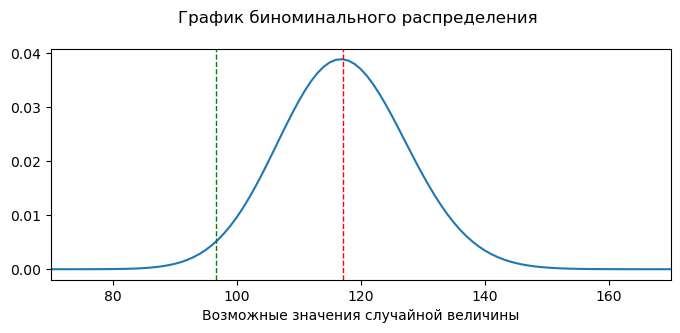

In [62]:
# График биноминального распределения
distr_=[]

for k in range(0,n+1):
  current_value = binom.pmf(k,n,p)
  distr_.append(current_value)

plt.figure(figsize=(8,3))
plt.plot(range(0,n+1), distr_);
plt.xlim([70,170])
plt.axvline(mu, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mu - 2*sigma, color='g', linestyle='dashed', linewidth=1)
plt.title('График биноминального распределения \n')
plt.xlabel('Возможные значения случайной величины')
plt.show();



---

Минимальное количество промокодов, которое необходимо разослать, чтобы вероятность не выполнить план в 100 подписок была примерно 5 %, составляет 1172 шт.  


---



### <a id='toc1_8_2_'></a>[Задача №2.](#toc0_)

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [63]:
# Оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей

n_2 = 1000000
p_2 = 0.4

open = 399500

mu_2 = n_2*p_2
sigma_2 = (n_2 * p_2 * (1-p_2))**0.5

distr_2 = st.norm(mu_2, sigma_2)

result_5 = distr_2.cdf(open)
result_5

print('Вероятность того, что уведомление откроют не более 399,5тыс пользователей, составляет {:.2f}%.'.format((result_5)*100))

Вероятность того, что уведомление откроют не более 399,5тыс пользователей, составляет 15.37%.


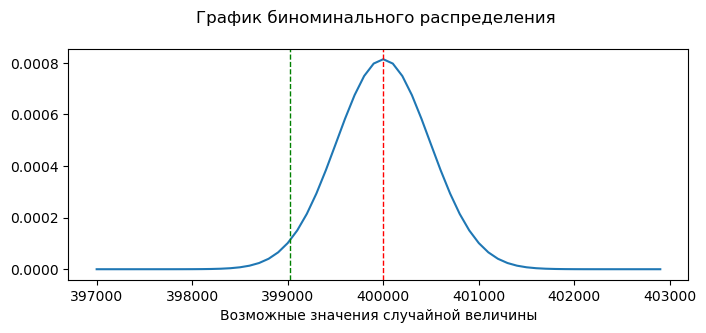

In [64]:
# График биноминального распределения
distr_2_=[]
n_2_ = 1000000
p_2_ = 0.4
mu_2_ = n_2_ * p_2_
sigma_2_ = (n_2_ * p_2_ * (1-p_2_))**0.5

for x in range(397000,403000,100):
  i = binom.pmf(x,n_2_,p_2_)
  distr_2_.append(i)

plt.figure(figsize=(8,3))
plt.plot(range(397000,403000,100), distr_2_);
plt.axvline(mu_2_, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mu_2_ - 2*sigma_2, color='g', linestyle='dashed', linewidth=1)
plt.title('График биноминального распределения \n')
plt.xlabel('Возможные значения случайной величины')
plt.show();




---


Вероятность того, что при рассылке 1 млн. промокодов уведомление откроют не более 399,5 тыс. пользователей, составляет 15.37%


---



## <a id='toc1_9_'></a>[Общий вывод](#toc0_)

В ходе работы над проектом сервиса аренды самокатов "GoFast" были проведены комплексный анализ данных и проверка ряда гипотез.

1. На первом этапе были загружены и предварительно обработаны данные из трех файлов.  
Созданы 3 датафрейма:

* `users_data` содержит информацию о пользователях, состоит из 1565 строк. Обнаружено и обработано явных дубликатов - 31.
* `rides_data` содержит информацию о поездках, состоит из 18068 строк. Явных дубликатов нет.
* `subscriptions_data` содержит описание тарифов, состоит из двух записей. Дубликатов нет.  

Данные собраны за период с 01.01.2021г. по 30.12.2021г.   
Пропуски в таблицах отсутствуют.  Для столбцов `data`, `subscription_type` и `user_id` исправлены типы данных.  


2. На этапе исследовательского анализа была рассмотрена и визуализирована общая информация о пользователях и поездках:

* имеются данные по 8-ми городам России: Москва, города юга (Сочи, Краснодар, Ростов-на-Дону, Пятигорск) и города Тюмень, Омск и Екатеринбург.
Больше всего в данных пользователей из Пятигорска, менее всего - из Москвы  
* количество пользователей с подпиской составляет 45.6% от общего числа пользователей в датасете.

* возраст пользователей составляет от 12 до 43 лет. При этом возраст 90% клиентов - от 19 до 31.  

* расстояние, которое пользователь преодолел за одну поездку - от 1м. до 7.2км.
Половина всех поездок было совершено на расстояние 2.5 - 3.7км.
При этом имеется небольшая, но явно определяющаяся группа поездок на расстояние до 1 километра.  

* средняя продолжительность поездок составляет около 17мин. Большинство поездок занимают от 5 до 31 мин.   

3. Следующим этапом стало объединение данных о пользователях, поездках и подписках в один датафрейм.  
На основании него были созданы две новые таблицы - отдельно для каждой категории подписки.

По результатам сравнительного анализа можно сказать, что сценарии использования самоката отличаются в зависимости от того, подключил ли пользователь подписку.  

Пользователи с подпиской чаще арендуют самокат для поездки на расстояния 2.7 - 3.5км, коротких поездок — небольшое количество. Можно предположить, что постоянные клиенты пользуются услугой для поездки на такие расстояния, где пешком - не быстро, а для заказа такси или для использования общественного транспорта — расстояние не большое.  

Пользователи без подписки чаще используют самокаты для коротких поездок (до 1 километра), а для более длинных поездок можно видеть больший разброс по значениям расстояния. С учетом частотности южных городов страны в записях, возможно без подписки пользователи часто используют самокат на прогулках и в отпуске. Также, именно у пользователей без подписки можно отметить записи с нулевой продолжительностью поездок — возможно, при первом использовании могут быть сложности с заказом или оплатой.

4. На следующем этапе были сформулированы и проверены следующие гипотезы:

* Гипотеза о том, что средняя продолжительность поездки у пользователей с подпиской и без подписки равна, была отвергнута в пользу альтернативной — cредняя продолжительность поездки у пользователей с подпиской больше, чем у пользователей без подписки. 


* Гипотеза о том, что среднее расстояние одной поездки у пользователей с подпиской составляет 3130м, не была отвергнута. Это подкрепляет расчет, что у пользователей с подпиской среднее расстояние за одну поездку не превосходит оптимальных с точки зрения износа самоката 3130 метров. 


* Гипотеза о том, что средняя выручка от пользователей с подпиской по месяцам равна средней выручке от пользователей без подписки была отвергнута в пользу альтернативной гипотезы — средняя выручка от пользователей с подпиской по месяцам больше средней выручки от пользователей без подписки.  


* Для проверки гипотезы о том, что после обновления количество обращений в тех.поддержку снизилось рекомендован к проведению парный t-тест Стьюдента — статистический метод, используемый для определения, есть ли значимая разница между средними двух связанных групп.


5. Дополнительно были решены задачи от отдела маркетинга компании:

* Минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план была примерно 5 %, составляет 1172. 

* Вероятность того, что при рассылке 1 млн. промокодов уведомление откроют не более 399,5 тыс. пользователей, составляет 15.37%


6. Подводя итог, важно еще раз отметить, что пользователи с подпиской выгоднее для компании. Подписку часто оформляют пользователи для регулярных поездок на средние расстояния, поэтому можно предложить отделу маркетинга дополнительно проанализировать сегментацию клиентов в данном срезе для привлечения новых клиентов наиболее прибыльной категории.
